Proyek Pertama : Membuat Model NLP dengan TensorFlow

Author: Fajar Ari Nugroho_1494037162101-489


Proyek pembuatan model ini menggunakan dataset berasal dari Kaggle, yaitu:<a href="https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category"> BBC articles fulltext and category</a>. Langkah pertama, yaitu me-load dan merubah format dataset .csv menjadi dataframe.

# Data Collect and Preprocessing

In [1]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
import pandas as pd

#Read data
sheet_url = gc.open_by_url('https://docs.google.com/spreadsheets/d/1A8sYQrCHEtUx24VKQIt7pJHfqU12wzV1QA4vyMakILw/edit#gid=416023702')
data = sheet_url.worksheet('bbc-text').get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


Terlihat bahwa dataset terdiri dari 2225 data dan tidak ada data yang null, untuk memastikan bahwa data sudah bersih, akan dicari apakah ada data duplikat, jika ada akan dihapus.

In [3]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.sample(5)

,category,text
645,sport,mcclaren targets champions league middlesbroug...
990,business,us in eu tariff chaos trade row the us has ask...
1065,sport,bellamy under new fire newcastle boss graeme s...
1244,business,uk house prices dip in november uk house price...
466,sport,healey targets england comeback leicester wing...


Dataset tidak berkurang yang menandakan bahwa tidak ada data yang duplikat. Selanjutnya akan dilakukan `removing stopwords` terlebih dahulu, untuk mengurangi kosa kata yang tidak begitu penting pada pemodelan kita menggunakan librari nltk.

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['tokenize'] = df['text'].apply(word_tokenize_wrapper)
df.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,category,text,tokenize
1593,sport,farrell saga to drag on - lindsay wigan chairm...,"[farrell, saga, to, drag, on, -, lindsay, wiga..."
195,politics,mp s shock at long lost daughter labour mp ste...,"[mp, s, shock, at, long, lost, daughter, labou..."
71,business,singapore growth at 8.1% in 2004 singapore s e...,"[singapore, growth, at, 8.1, %, in, 2004, sing..."
546,sport,radcliffe enjoys winning comeback paula radcli...,"[radcliffe, enjoys, winning, comeback, paula, ..."
164,politics,ukip candidate suspended eurosceptic party uki...,"[ukip, candidate, suspended, eurosceptic, part..."


In [8]:
list_stopwords = set(stopwords.words('english'))

def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]

df['text_stopwords'] = df['tokenize'].apply(stopwords_removal)
df.sample(5)

,category,text,tokenize,text_stopwords
1663,sport,robben sidelined with broken foot chelsea wing...,"[robben, sidelined, with, broken, foot, chelse...","[robben, sidelined, broken, foot, chelsea, win..."
801,sport,ireland 19-13 england ireland consigned englan...,"[ireland, 19-13, england, ireland, consigned, ...","[ireland, 19-13, england, ireland, consigned, ..."
447,business,weak data buffets french economy a batch of do...,"[weak, data, buffets, french, economy, a, batc...","[weak, data, buffets, french, economy, batch, ..."
2158,politics,tsunami won t divert africa aid uk aid to he...,"[tsunami, won, t, divert, africa, aid, uk, aid...","[tsunami, divert, africa, aid, uk, aid, help, ..."
1041,entertainment,aviator creator in oscars snub the man who s...,"[aviator, creator, in, oscars, snub, the, man,...","[aviator, creator, oscars, snub, man, said, go..."


In [9]:
df['description'] = df['text_stopwords'].apply(' '.join)
df = df[['text', 'tokenize', 'text_stopwords', 'description', 'category']]
df.sample(5)

,text,tokenize,text_stopwords,description,category
548,lib dems unveil women s manifesto the liberal ...,"[lib, dems, unveil, women, s, manifesto, the, ...","[lib, dems, unveil, women, manifesto, liberal,...",lib dems unveil women manifesto liberal democr...,politics
1739,collins to compete in birmingham world and com...,"[collins, to, compete, in, birmingham, world, ...","[collins, compete, birmingham, world, commonwe...",collins compete birmingham world commonwealth ...,sport
1130,what price for trusted pc security you can ...,"[what, price, for, trusted, pc, security, you,...","[price, trusted, pc, security, buy, trusted, c...",price trusted pc security buy trusted computer...,tech
265,davenport hits out at wimbledon world number o...,"[davenport, hits, out, at, wimbledon, world, n...","[davenport, hits, wimbledon, world, number, on...",davenport hits wimbledon world number one lind...,sport
1264,poll explains free-kick decision referee graha...,"[poll, explains, free-kick, decision, referee,...","[poll, explains, free-kick, decision, referee,...",poll explains free-kick decision referee graha...,sport


Tahap akhir, akan dilakukan drop kolom yang tidak dibutuhkan dan gunakan kolom `description` dan `category` saja untuk pemodelan yang akan dibuat.

In [10]:
df_fin = df.drop(columns=['text', 'tokenize', 'text_stopwords'])
df_fin.sample(5)

,description,category
1021,format wars could confuse users technology fir...,tech
619,virgin radio offers 3g broadcast uk broadcaste...,tech
2026,job cuts false economy - tuc plans shed 71 000...,politics
1359,howard taunts blair splits tony blair feud gor...,politics
372,u2 play grammy awards show irish rock band u2 ...,entertainment


Setelah data dirasa sudah bersih dan siap, selanjutnya untuk kolom `category` akan dipecah ke masing-masing kolom menggunakan teknik `one-hot-encoding`

In [11]:
kategori = pd.get_dummies(df_fin.category)
df_new = pd.concat([df_fin, kategori], axis=1)
df_new = df_new.drop(columns='category')
df_new.sample(5)

,description,business,entertainment,politics,sport,tech
1857,parliament record scandal locked room heart pa...,0,0,1,0,0
392,robinson answers critics england captain jason...,0,0,0,1,0
1334,clarke defends terror detentions home secretar...,0,0,1,0,0
1921,talks held gibraltar future two days talks fut...,0,0,1,0,0
818,parmalat boasts doubled profits parmalat itali...,1,0,0,0,0


# Modelling

Sebelum membuat model, dilakukan dahulu perubahan format dari dataframe menjadi numpy array, dan dilanjutkan dengan membagi dataset menjadi data train dan data test.

In [12]:
desc = df_new['description'].values
label = df_new[['business',	'entertainment',	'politics',	'sport',	'tech']].values

In [13]:
from sklearn.model_selection import train_test_split

train_desc, test_desc, train_label, test_label = train_test_split(desc, label, test_size=0.2)

Dilanjutkan dengan proses tokenisasi pada array

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(train_desc)
tokenizer.fit_on_texts(test_desc)

In [16]:
train_sequences = tokenizer.texts_to_sequences(train_desc)
test_sequences = tokenizer.texts_to_sequences(test_desc)

padded_train = pad_sequences(train_sequences)
padded_test = pad_sequences(test_sequences)

Disini, akan dibuat model untuk NLP menggunakan Sequential dengan layer Embedding dan LSTM, kemudian dilanjutkan pembuatan loss function dan optimizer.

In [20]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                

Sebelum model dilatih, dilakukan pembuatan fungsi `callback` terlebih dahulu agar ketika sudah mencapai nilai akurasi yang diinginkan proses dapat dihentikan yang akan mempersingkat pemodelan.

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.98):
      print('\nEpoch', epoch, '\nGreat!, Accuracy has reached = %2.2f%%' %(logs['accuracy']*100), 'training is already stop!')
      self.model.stop_training = True

Sekarang waktunya melatih model yang sudah dibuat!

In [22]:
num_epochs = 20

history = model.fit(
    padded_train,
    train_label,
    epochs=num_epochs,
    validation_data=(padded_test, test_label),
    batch_size=128,
    verbose=2,
    callbacks = [myCallback()]
)

Epoch 1/20
14/14 - 49s - loss: 1.6070 - accuracy: 0.2253 - val_loss: 1.6054 - val_accuracy: 0.2157 - 49s/epoch - 4s/step
Epoch 2/20
14/14 - 49s - loss: 1.6009 - accuracy: 0.2416 - val_loss: 1.6035 - val_accuracy: 0.2157 - 49s/epoch - 4s/step
Epoch 3/20
14/14 - 47s - loss: 1.5931 - accuracy: 0.2455 - val_loss: 1.5752 - val_accuracy: 0.2157 - 47s/epoch - 3s/step
Epoch 4/20
14/14 - 46s - loss: 1.5758 - accuracy: 0.2983 - val_loss: 1.5777 - val_accuracy: 0.3011 - 46s/epoch - 3s/step
Epoch 5/20
14/14 - 46s - loss: 1.5400 - accuracy: 0.3652 - val_loss: 1.5182 - val_accuracy: 0.4809 - 46s/epoch - 3s/step
Epoch 6/20
14/14 - 46s - loss: 1.4030 - accuracy: 0.5112 - val_loss: 1.3423 - val_accuracy: 0.5753 - 46s/epoch - 3s/step
Epoch 7/20
14/14 - 46s - loss: 1.0929 - accuracy: 0.6135 - val_loss: 0.9575 - val_accuracy: 0.6449 - 46s/epoch - 3s/step
Epoch 8/20
14/14 - 49s - loss: 0.6881 - accuracy: 0.7309 - val_loss: 0.6361 - val_accuracy: 0.7438 - 49s/epoch - 4s/step
Epoch 9/20
14/14 - 46s - loss: 0

# Evaluation

Untuk melihat bagaimana kinerja model yang sudah dibuat, digambarkan melalui plot berikut

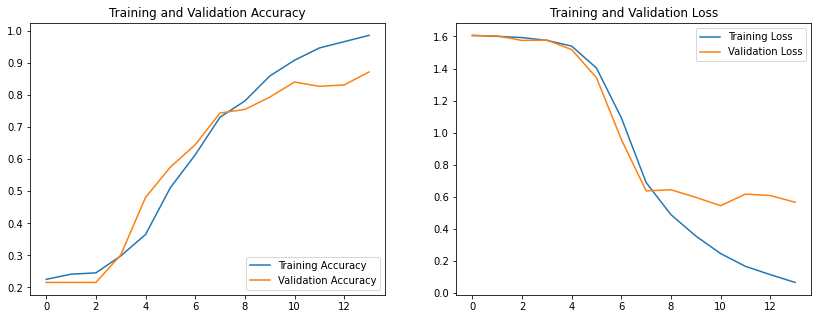

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(14, 5))
# Accuracy Plot
plt.subplot(1, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Nampaknya, model yang telah dibuat masih menunjukkan adanya overfitting, sehingga saran yang dapat dilakukan adalah menambahkan dropout layer atau bisa melakukan normalisasi sebelumnya.